In [5]:
import os
import numpy as np
import pandas as pd
import lightgbm as lgb
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from utils import timer
import matplotlib.pyplot as plt
import shap

In [13]:
combined = pd.read_csv("generated_data/tsfresh_features_v4.csv")

In [14]:
print("columns:", combined.columns)
x = combined.drop(['bookingID', 'label'], axis=1)
y = combined.label.values

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=42)

columns: Index(['Speed__count_above_mean', 'Speed__longest_strike_above_mean',
       'Speed__maximum', 'Speed__mean', 'Speed__mean_abs_change',
       'Speed__mean_change', 'Speed__median', 'Speed__minimum',
       'Speed__number_cwt_peaks__n_1', 'Speed__number_cwt_peaks__n_5',
       'Speed__number_peaks__n_1', 'Speed__number_peaks__n_10',
       'Speed__number_peaks__n_3', 'Speed__number_peaks__n_5',
       'Speed__number_peaks__n_50', 'Speed__ratio_beyond_r_sigma__r_0.5',
       'Speed__ratio_beyond_r_sigma__r_1',
       'Speed__ratio_beyond_r_sigma__r_1.5',
       'Speed__ratio_beyond_r_sigma__r_2', 'Speed__standard_deviation',
       'Speed__sum_values', 'acceleration_abs__count_above_mean',
       'acceleration_abs__longest_strike_above_mean',
       'acceleration_abs__maximum', 'acceleration_abs__mean',
       'acceleration_abs__mean_abs_change', 'acceleration_abs__mean_change',
       'acceleration_abs__median', 'acceleration_abs__minimum',
       'acceleration_abs__number_cwt

In [15]:
params = {
    "num_leaves": 12,
    "objective": "binary",
    "max_depth": 4,
    "learning_rate": 0.005,
    "boosting_type": "gbdt",
    "feature_fraction": 0.7,
    # "bagging_fraction": 0.7,
    # "bagging_freq": 1,
    # "lambda_l1": 0.1,
    # "lambda_l2": 0.1,
    "random_state": 10000019,
    # "verbosity": 1,
    "num_boost_round": 700,
    "metric": "auc",
    # "metric": "binary_logloss",
    "scale_pos_weight": 4,
}

d_train = lgb.Dataset(x_train, label=y_train)
d_valid = lgb.Dataset(x_valid, label=y_valid)
model = lgb.train(params, train_set=d_train, valid_sets=[d_valid], verbose_eval=100)
y_valid_pred = model.predict(x_valid)

/home/lingxz/.conda/envs/scientific/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's auc: 0.718706
[200]	valid_0's auc: 0.724262
[300]	valid_0's auc: 0.726538
[400]	valid_0's auc: 0.728324
[500]	valid_0's auc: 0.729764
[600]	valid_0's auc: 0.731315
[700]	valid_0's auc: 0.732527


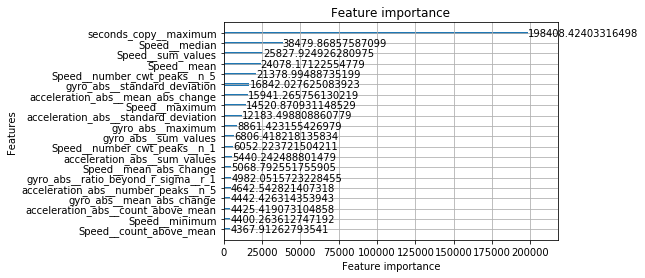

In [16]:
# Plot importance
lgb.plot_importance(model, max_num_features=20, importance_type="gain")

In [17]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

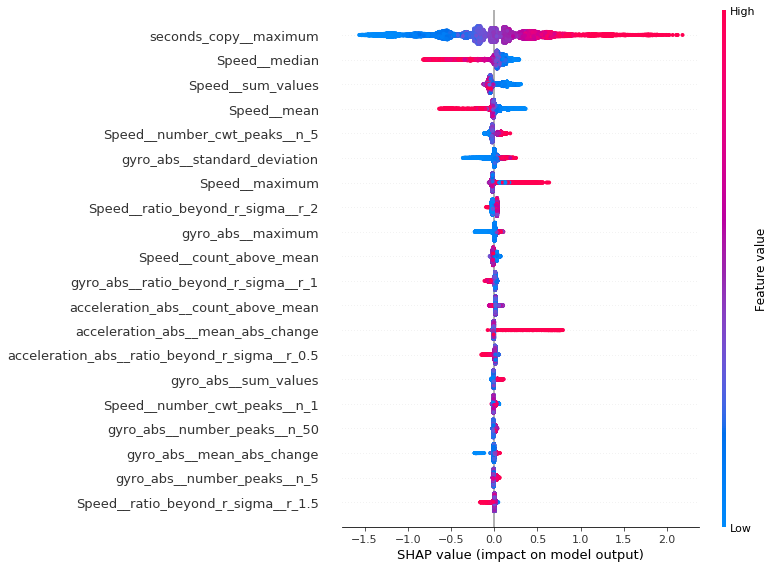

In [18]:
shap.summary_plot(shap_values, x_train)

In [19]:
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])